In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

from tensorflow.contrib import learn
from sklearn.metrics import mean_squared_error

from lstm import lstm_model
from data_processing import generate_data #user module


In [2]:
LOG_DIR = './ops_logs/sin'
INPUT_NODE = 3
RNN_LAYERS = [{'num_units': 5}]
DENSE_LAYERS = None #last layer of neurons before output
TRAINING_STEPS = 10000
PRINT_STEPS = TRAINING_STEPS / 10
BATCH_SIZE = 100

In [3]:
regressor = learn.SKCompat(learn.Estimator(
    model_fn=lstm_model(
        INPUT_NODE,
        RNN_LAYERS,
        DENSE_LAYERS
    ),
    model_dir=LOG_DIR
))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000000115D91D0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': './ops_logs/sin'}


In [4]:

#X ,y is both sin(t), X[0] = sin(t) ,X[1] = sin(t+1),X[1] = sin(t+1),
X, y = generate_data(np.sin, np.linspace(0, 100, 10000, dtype=np.float32), INPUT_NODE, seperate=False)

print(X['test'].shape)
print(y['test'].shape)
# create a lstm instance and validation monitor
validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'],
                                                     every_n_steps=PRINT_STEPS,
                                                     early_stopping_rounds=1000)
regressor.fit(X['train'], y['train'], 
              monitors=[validation_monitor], 
              batch_size=BATCH_SIZE,
              steps=TRAINING_STEPS)

(997, 3, 1)
(997, 1)
Instructions for updating:
Monitors are deprecated. Please use tf.train.SessionRunHook.
Instructions for updating:
Use `tf.contrib.losses.mean_squared_error` and explicit logits computation.
Instructions for updating:
Use tf.losses.mean_squared_error instead.
Instructions for updating:
Use tf.losses.compute_weighted_loss instead.
Instructions for updating:
Use tf.losses.add_loss instead.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from ./ops_logs/sin\model.ckpt-120005
INFO:tensorflow:Saving checkpoints for 120006 into ./ops_logs/sin\model.ckpt.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving

INFO:tensorflow:global_step/sec: 478.441
INFO:tensorflow:loss = 4.61578e-05, step = 123506 (0.213 sec)
INFO:tensorflow:global_step/sec: 568.15
INFO:tensorflow:loss = 4.78848e-05, step = 123606 (0.172 sec)
INFO:tensorflow:global_step/sec: 624.963
INFO:tensorflow:loss = 5.14091e-05, step = 123706 (0.161 sec)
INFO:tensorflow:global_step/sec: 534.729
INFO:tensorflow:loss = 4.91923e-05, step = 123806 (0.184 sec)
INFO:tensorflow:global_step/sec: 640.989
INFO:tensorflow:loss = 5.02466e-05, step = 123906 (0.156 sec)
INFO:tensorflow:global_step/sec: 636.907
INFO:tensorflow:loss = 5.27289e-05, step = 124006 (0.163 sec)
INFO:tensorflow:global_step/sec: 584.762
INFO:tensorflow:loss = 4.72228e-05, step = 124106 (0.168 sec)
INFO:tensorflow:global_step/sec: 520.804
INFO:tensorflow:loss = 4.75437e-05, step = 124206 (0.188 sec)
INFO:tensorflow:global_step/sec: 602.375
INFO:tensorflow:loss = 4.73581e-05, step = 124306 (0.167 sec)
INFO:tensorflow:global_step/sec: 628.895
INFO:tensorflow:loss = 5.37635e-0

SKCompat()

In [5]:
predicted = regressor.predict(X['test'])
rmse = np.sqrt(((predicted - y['test']) ** 2).mean(axis=0))
score = mean_squared_error(predicted, y['test'])
print ("MSE: %f" % score)

Instructions for updating:
Use `tf.contrib.losses.mean_squared_error` and explicit logits computation.
Instructions for updating:
Use tf.losses.mean_squared_error instead.
Instructions for updating:
Use tf.losses.compute_weighted_loss instead.
Instructions for updating:
Use tf.losses.add_loss instead.
INFO:tensorflow:Restoring parameters from ./ops_logs/sin\model.ckpt-130005
MSE: 0.000035


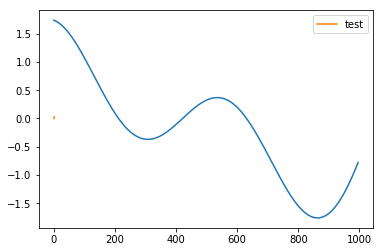

In [6]:
plot_predicted, = plt.plot(predicted, label='predicted')
plot_test, = plt.plot(X['train'][0], label='test')
plt.legend(handles=[plot_test])

In [7]:
def get_X(input):
    A = input[:-2]
    B = input[1:-1]
    C = input[2:]
    return np.array([[A, B, C]]).T

In [8]:
print(X['test'][0,0:3])
gen_wav = np.zeros([1000,1],dtype = np.float32)
gen_wav[0:3] = X['test'][0,0:3]
foo = np.array([gen_wav[0:3]]).T
print (foo.shape)

[[ 1.74318624]
 [ 1.74117708]
 [ 1.73905957]]
(1, 3, 1)


99
Instructions for updating:
Use `tf.contrib.losses.mean_squared_error` and explicit logits computation.
Instructions for updating:
Use tf.losses.mean_squared_error instead.
Instructions for updating:
Use tf.losses.compute_weighted_loss instead.
Instructions for updating:
Use tf.losses.add_loss instead.
INFO:tensorflow:Restoring parameters from ./ops_logs/sin\model.ckpt-130005


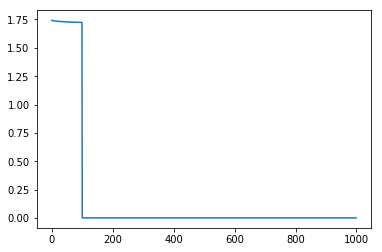

In [18]:
from IPython.display import clear_output
gen_wav = np.zeros([1000,1])
gen_wav[0:3] = np.array(X['test'][0,0:3])
for i in range(3,100):
    clear_output()
    print(i)
    gen_wav[i] = regressor.predict(np.float32( np.array([gen_wav[i-3:i]]).T));

plt.plot(gen_wav)

In [10]:
print(gen_wav[0:20])

[[ 1.74318624]
 [ 1.74117708]
 [ 1.73905957]
 [ 1.73923588]
 [ 1.73877907]
 [ 1.73844576]
 [ 1.73810482]
 [ 1.73777175]
 [ 1.73744559]
 [ 1.73712611]
 [ 1.73681331]
 [ 1.7365067 ]
 [ 1.73620653]
 [ 1.73591256]
 [ 1.73562431]
 [ 1.73534203]
 [ 1.73506546]
 [ 1.73479462]
 [ 1.73452902]
 [ 1.73426914]]


(897, 3, 1)
(897, 1)
(997,)
(1994,)


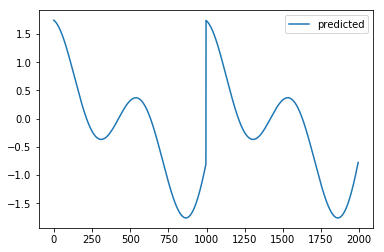

In [11]:

print(X['val'].shape)
print(y['val'].shape)
Xa = np.array(X['test'])
ya = np.array(y['test'])
print(predicted.shape)

z = np.concatenate((Xa[:,0,0],predicted))
print(z.shape)
# plot_test, = plt.plot(Xa[:,0,0])
plot_test, = plt.plot(z)

plt.legend(handles=[plot_predicted])

In [12]:
pre = 

SyntaxError: invalid syntax (<ipython-input-12-d1ef172ead95>, line 1)